# Proportion of reads mapping back to ORFs

In [7]:
%matplotlib inline
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def parse_mapped_read_stats(rpkm):
    """
    Parse BBMap RPKM output file for basic mapping stats.
    """
    with open(rpkm) as f:
        reads_file = f.readline().strip().split()[1]
        reads = int(f.readline().strip().split()[1])
        mapped = int(f.readline().strip().split()[1])
        refseqs = int(f.readline().strip().split()[1])
        return reads_file, reads, mapped, refseqs               

In [14]:
rpkm_files = glob("/home/ctmr/projects/labcore/seq_depth/nextflow_output/metagenemark_contigs/*rpkm*")
mapped_read_stats = [parse_mapped_read_stats(fn) for fn in rpkm_files]
stats = pd.DataFrame(mapped_read_stats, columns=["Reads_file", "Reads", "Mapped_reads", "Refseqs"])

In [35]:
stats["Proportion"] = stats["Mapped_reads"] / stats["Reads"]
stats["Sample_type"] = stats["Reads_file"].str.split("_", expand=True)[0]

In [98]:
sample_type_color = {st: idx for idx, st in enumerate(set(stats["Sample_type"]))}
colors = [sample_type_color[st] for st in stats["Sample_type"]]
cmap = plt.cm.get_cmap('viridis', 4)

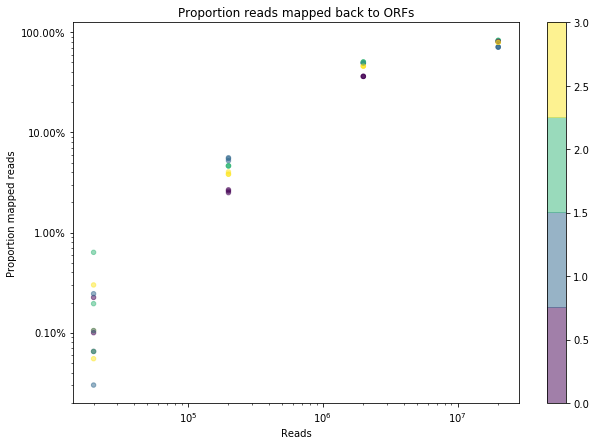

In [127]:
fig, ax = plt.subplots(figsize=(10,7))
stats.plot.scatter(x="Reads", y="Proportion", ax=ax, c=colors, cmap=cmap, alpha=0.5, logy=True, logx=True)
_ = ax.set_title("Proportion reads mapped back to ORFs")
_ = ax.set_xlabel("Reads")
_ = ax.set_ylabel("Proportion mapped reads")
_ = ax.set_yticklabels(["{:3.2f}%".format(y*100) for y in ax.get_yticks()])